In [1]:
import numpy as np
import matplotlib.pyplot as plt

class BernoulliBandit:
    def __init__(self, probabilities):
        self.probs = probabilities
        self.k = len(probabilities)

    def pull(self, arm):
        return 1 if np.random.rand() < self.probs[arm] else 0

    def optimal_reward(self):
        return max(self.probs)

class EpsilonGreedy:
    def __init__(self, bandit, epsilon):
        self.bandit = bandit
        self.epsilon = epsilon
        self.counts = np.zeros(bandit.k)
        self.values = np.zeros(bandit.k)
        self.total_regret = 0
        self.regret_history = []

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.bandit.k)
        else:
            return np.argmax(self.values)

    def update(self, chosen, reward, t):
        self.counts[chosen] += 1
        n = self.counts[chosen]
        self.values[chosen] += (reward - self.values[chosen]) / n
        regret = self.bandit.optimal_reward() - self.bandit.probs[chosen]
        self.total_regret += regret
        self.regret_history.append(self.total_regret)

    def run(self, horizon):
        for t in range(1, horizon + 1):
            arm = self.select_arm()
            reward = self.bandit.pull(arm)
            self.update(arm, reward, t)
        return self.total_regret, np.argmax(self.values)

class UCB:
    def __init__(self, bandit, c):
        self.bandit = bandit
        self.c = c
        self.counts = np.zeros(bandit.k)
        self.values = np.zeros(bandit.k)
        self.total_regret = 0
        self.regret_history = []

    def select_arm(self, t):
        for arm in range(self.bandit.k):
            if self.counts[arm] == 0:
                return arm
        ucb_values = self.values + self.c * np.sqrt(np.log(t) / self.counts)
        return np.argmax(ucb_values)

    def update(self, chosen, reward, t):
        self.counts[chosen] += 1
        n = self.counts[chosen]
        self.values[chosen] += (reward - self.values[chosen]) / n
        regret = self.bandit.optimal_reward() - self.bandit.probs[chosen]
        self.total_regret += regret
        self.regret_history.append(self.total_regret)

    def run(self, horizon):
        for t in range(1, horizon + 1):
            arm = self.select_arm(t)
            reward = self.bandit.pull(arm)
            self.update(arm, reward, t)
        return self.total_regret, np.argmax(self.values)

class ThompsonSampling:
    def __init__(self, bandit):
        self.bandit = bandit
        self.alphas = np.ones(bandit.k)
        self.betas = np.ones(bandit.k)
        self.total_regret = 0
        self.regret_history = []

    def select_arm(self):
        samples = np.random.beta(self.alphas, self.betas)
        return np.argmax(samples)

    def update(self, chosen, reward):
        if reward == 1:
            self.alphas[chosen] += 1
        else:
            self.betas[chosen] += 1
        regret = self.bandit.optimal_reward() - self.bandit.probs[chosen]
        self.total_regret += regret
        self.regret_history.append(self.total_regret)

    def run(self, horizon):
        for _ in range(horizon):
            arm = self.select_arm()
            reward = self.bandit.pull(arm)
            self.update(arm, reward)
        return self.total_regret, np.argmax(self.alphas / (self.alphas + self.betas))


def run_experiment(probs, horizon=1000, eps=0.1, c=2):
    bandit = BernoulliBandit(probs)
    eg = EpsilonGreedy(bandit, epsilon=eps)
    ucb = UCB(bandit, c=c)
    ts = ThompsonSampling(bandit)

    regret_eg, best_eg = eg.run(horizon)
    regret_ucb, best_ucb = ucb.run(horizon)
    regret_ts, best_ts = ts.run(horizon)

    print(f"Epsilon-Greedy: Total Regret = {regret_eg:.2f}, Best Arm = {best_eg}")
    print(f"UCB:             Total Regret = {regret_ucb:.2f}, Best Arm = {best_ucb}")
    print(f"ThompsonSampling: Total Regret = {regret_ts:.2f}, Best Arm = {best_ts}")

    plt.figure(figsize=(10, 6))
    plt.plot(eg.regret_history, label='Epsilon-Greedy')
    plt.plot(ucb.regret_history, label='UCB')
    plt.plot(ts.regret_history, label='Thompson Sampling')
    plt.xlabel('Timesteps')
    plt.ylabel('Cumulative Regret')
    plt.legend()
    plt.title('Total Regret vs Timesteps')
    plt.show()




Epsilon-Greedy: Total Regret = 58.50, Best Arm = 2
UCB:             Total Regret = 131.55, Best Arm = 2
ThompsonSampling: Total Regret = 13.40, Best Arm = 2


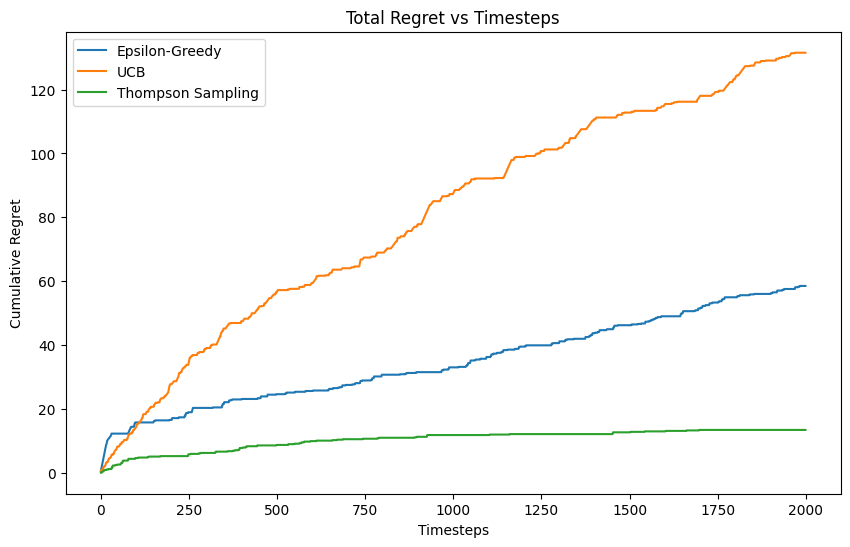


Custom Bandit Evaluation:
Epsilon-Greedy: Total Regret = 91.30, Best Arm = 2
UCB:             Total Regret = 89.30, Best Arm = 2
ThompsonSampling: Total Regret = 9.70, Best Arm = 2


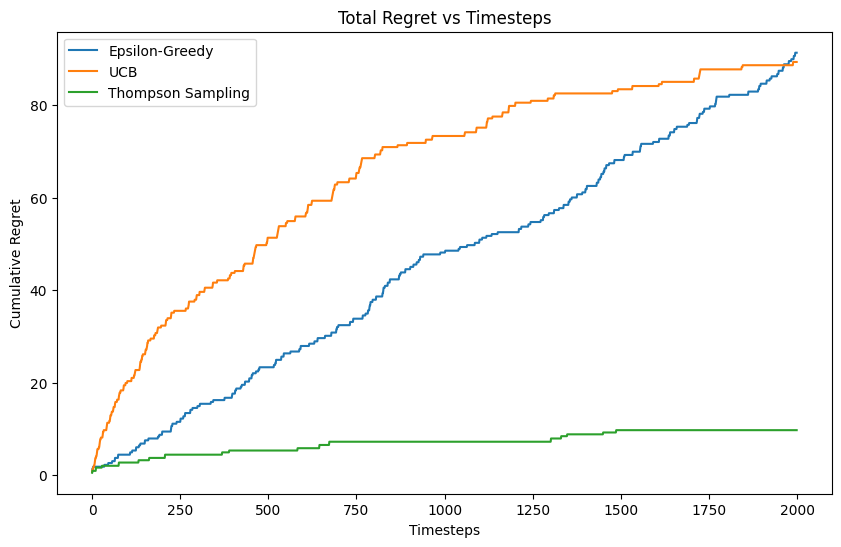

In [3]:

if __name__ == '__main__':
    # Example run
    probabilities = [0.2, 0.5, 0.75, 0.6]
    run_experiment(probabilities, horizon=2000, eps=0.1, c=2)

    # Custom evaluation block
    # Change probabilities here to test different bandits
    custom_probs = [0.1, 0.3, 0.8, 0.4]
    print("\nCustom Bandit Evaluation:")
    run_experiment(custom_probs, horizon=2000, eps=0.1, c=2)